##다중 분류 학습

In [56]:
#import 
import pandas as pd 
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
#load_data
red = pd.read_csv('/content/winequality-red.csv')
white = pd.read_csv('/content/winequality-white.csv',sep = ';')

In [58]:
#data concat 
wine = pd.concat([red,white])


In [59]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [60]:
#wine quality 를 0 과 1 과 2 로 바꿈
wine.loc[wine['quality']<= 5 ,'new_quality'] = 0
wine.loc[wine['quality'] == 6 ,'new_quality'] = 1
wine.loc[wine['quality']>=7 ,'new_quality'] = 2 

In [61]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,2.0


In [62]:
#quality 데이터 삭제하기 
del wine['quality']

In [63]:
#정규화 시키기 minmax 
wine_norm = (wine - wine.min())/(wine.max() - wine.min())

In [64]:
print(wine_norm)

      fixed acidity  volatile acidity  ...   alcohol  new_quality
0          0.297521          0.413333  ...  0.202899          0.0
1          0.330579          0.533333  ...  0.260870          0.0
2          0.330579          0.453333  ...  0.260870          0.0
3          0.611570          0.133333  ...  0.260870          0.5
4          0.297521          0.413333  ...  0.202899          0.0
...             ...               ...  ...       ...          ...
4893       0.198347          0.086667  ...  0.463768          0.5
4894       0.231405          0.160000  ...  0.231884          0.0
4895       0.223140          0.106667  ...  0.202899          0.5
4896       0.140496          0.140000  ...  0.695652          1.0
4897       0.181818          0.086667  ...  0.550725          0.5

[6497 rows x 12 columns]


In [65]:
#shuffle
wine_shuffle = wine_norm.sample(frac = 1)

In [66]:
#np 
wine_np = wine_shuffle.to_numpy()

In [67]:
#train_test_index
train_ratio = 0.8
train_test_index = int(train_ratio * wine_shuffle.shape[0])

In [68]:
#train_test_split
train_x,train_y = wine_np[:train_test_index , :-1],wine_np[:train_test_index , -1:]  
test_x,test_y = wine_np[train_test_index: , :-1] , wine_np[train_test_index:,-1:]

In [69]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(5197, 11)
(5197, 1)
(1300, 11)
(1300, 1)


In [70]:
#train_y test_ y onehot vector 처리
train_y_to_categorical = tf.keras.utils.to_categorical(train_y,num_classes = 3)
test_y_to_categorical = tf.keras.utils.to_categorical(test_y,num_classes = 3)

In [71]:
print(train_y_to_categorical)
print(test_y_to_categorical)

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [72]:
#model 생성
model = tf.keras.Sequential([
            tf.keras.layers.Dense(units = 48 , activation = 'swish',input_shape = (11,)),
            tf.keras.layers.Dense(units = 24 , activation = 'swish'),
            tf.keras.layers.Dense(units = 12, activation = 'swish'),
            tf.keras.layers.Dense(units = 3 , activation = 'softmax'),
])

In [73]:
#model compile
model.compile(optimizer=tf.keras.optimizers.Adam(),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [74]:
history = model.fit(train_x,train_y_to_categorical,epochs = 200 ,batch_size=32 ,validation_split=0.2,callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience= 10))


Epoch 1/200
130/130 [==============================] - 1s 3ms/step - loss: 0.6723 - accuracy: 0.7811 - val_loss: 0.5091 - val_accuracy: 0.8000
Epoch 2/200
130/130 [==============================] - 0s 2ms/step - loss: 0.4839 - accuracy: 0.8032 - val_loss: 0.4579 - val_accuracy: 0.8000
Epoch 3/200
130/130 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8085 - val_loss: 0.4141 - val_accuracy: 0.8000
Epoch 4/200
130/130 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8104 - val_loss: 0.4031 - val_accuracy: 0.8163
Epoch 5/200
130/130 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 0.8116 - val_loss: 0.3997 - val_accuracy: 0.8202
Epoch 6/200
130/130 [==============================] - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8124 - val_loss: 0.4278 - val_accuracy: 0.8019
Epoch 7/200
130/130 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8181 - val_loss: 0.4013 - val_accuracy: 0.8144

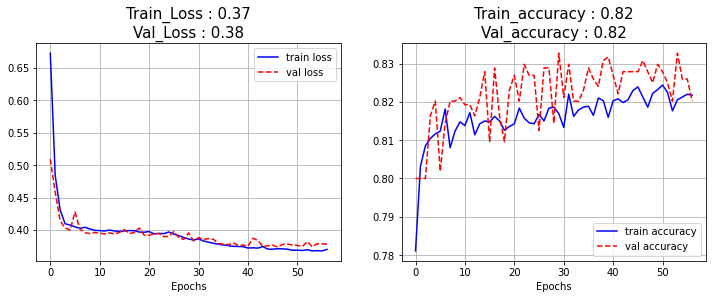

In [75]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

val_loss = history.history['val_loss']
loss = history.history['loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.plot(history.history['loss'], 'b-', label = 'train loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val loss')
plt.xlabel('Epochs')

plt.title("Train_Loss : {:.2f}\nVal_Loss : {:.2f}".\
          format(loss[-1], val_loss[-1]), fontsize = 15)

plt.legend()
plt.grid()

plt.subplot(1, 2, 2)

plt.plot(history.history['accuracy'], 'b-', label = 'train accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label = 'val accuracy')
plt.xlabel('Epochs')

plt.title("Train_accuracy : {:.2f}\nVal_accuracy : {:.2f}".\
          format(accuracy[-1], val_accuracy[-1]), fontsize = 15)

plt.legend()
plt.grid()

plt.show()

In [76]:
#model 예측 
pred_y = model.predict(test_x)

pred_y_round = np.round(pred_y,2)
pred_y_argmax = np.argmax(pred_y_round,axis = 1)


test_y_argmax = np.argmax(test_y_to_categorical,axis =1)
pred_y_final = pred_y_argmax.reshape(-1,1)
test_y_final = test_y_argmax.reshape(-1,1)

print(np.mean(np.equal(pred_y_final , test_y_final)))

0.8253846153846154
